In [1]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

from os import listdir
from os.path import isfile, isdir, join, exists

In [2]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['font.size'] = 14

In [3]:
datasetpath = '../../src/datasets/'
data = [ f for f in listdir(datasetpath) if isdir(join(datasetpath, f))] 
data
#filename = '../../src/datasets/EmailEUCore/EmailEUCore.csv'

['Emailcontacts',
 'EmailURV',
 'EmailEUCore',
 'POK',
 'AdultIMDB',
 'LesMiserables']

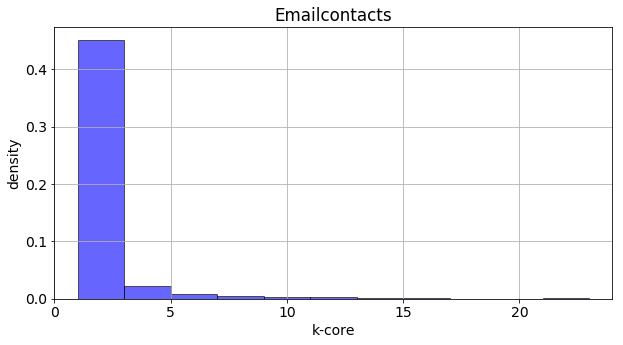

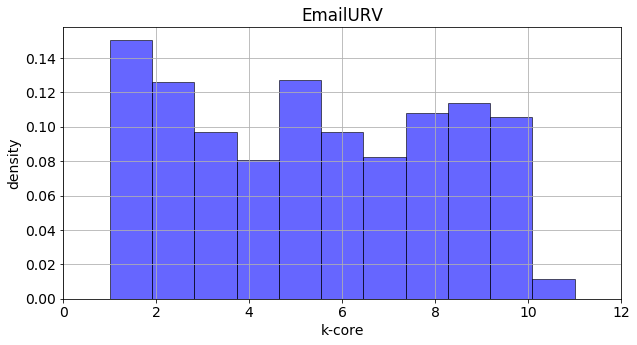

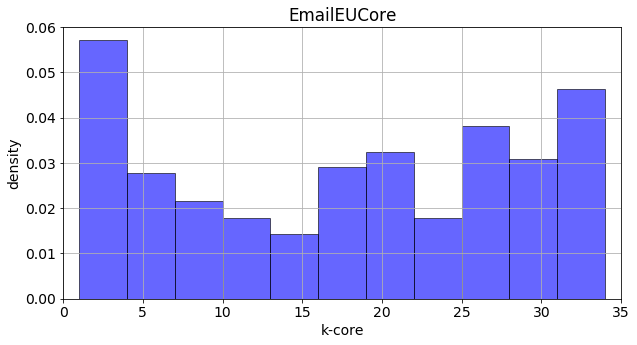

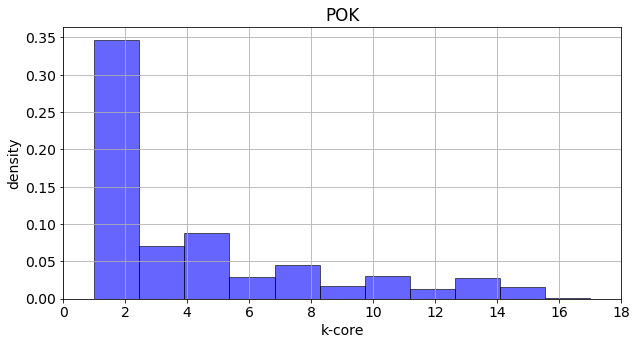

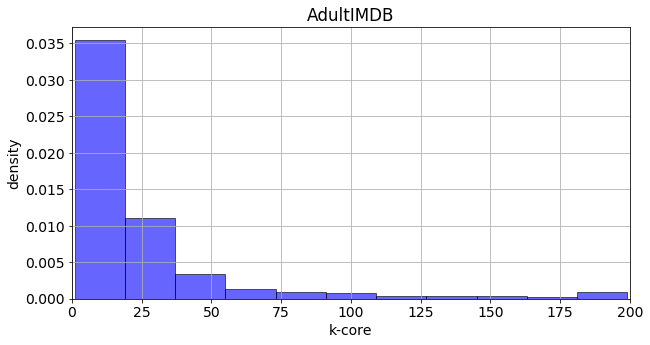

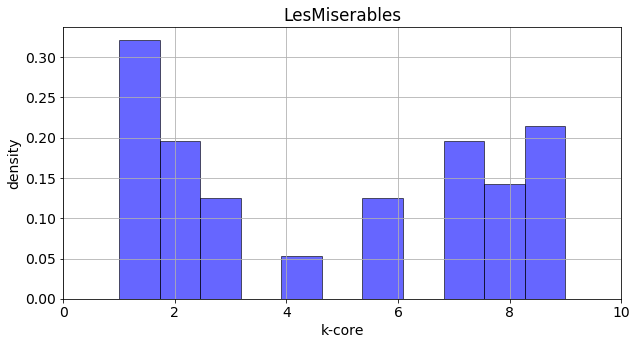

In [5]:
for dataset in data:
    G = nx.Graph()
    with open(join(datasetpath,dataset,dataset+'.csv'), 'r') as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            G.add_edge(int(row[0]), int(row[1]))

    cores = list(nx.core_number(G).values())
    n_bins = 11
    plt.figure()
    plt.grid()
    n, bins, patches = plt.hist(cores, n_bins, density=1, facecolor='blue', alpha=0.6)
    plt.title(dataset)
    plt.xlim([0,max(cores)+1])
    plt.xlabel('k-core')
    plt.ylabel('density')
    plt.savefig(join('/home/nik/Documents/masterthesis/img/pdf', dataset+'KCoreDist.pdf'))
    plt.show()